In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [53]:
df = pd.read_csv("data/Water Quality Testing.csv")

In [54]:
df.head(10)

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352
5,6,6.89,23.6,4.6,7.2,320
6,7,7.19,21.2,4.2,8.8,350
7,8,6.98,22.1,3.7,6.9,325
8,9,7.31,20.4,4.1,8.4,360
9,10,7.02,22.7,4.8,7.5,330


In [55]:
df.describe()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,7.161140,22.054400,4.169400,8.382200,344.362000
std,144.481833,0.107531,0.903123,0.397492,0.822396,13.038672
min,1.000000,6.830000,20.300000,3.100000,6.000000,316.000000
25%,125.750000,7.080000,21.200000,3.800000,7.800000,333.000000
50%,250.500000,7.160000,22.200000,4.200000,8.400000,344.000000
75%,375.250000,7.250000,22.900000,4.500000,9.100000,355.000000
max,500.000000,7.480000,23.600000,5.100000,9.900000,370.000000


In [56]:
df.shape

(500, 6)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         500 non-null    float64
 3   Turbidity (NTU)          500 non-null    float64
 4   Dissolved Oxygen (mg/L)  500 non-null    float64
 5   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [58]:
df.isna().sum()

Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

In [59]:
df.columns = ["sample_id", "ph", "temperature", "turbidity", "do", "conductivity"]

df.head(10)

,sample_id,ph,temperature,turbidity,do,conductivity
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352
5,6,6.89,23.6,4.6,7.2,320
6,7,7.19,21.2,4.2,8.8,350
7,8,6.98,22.1,3.7,6.9,325
8,9,7.31,20.4,4.1,8.4,360
9,10,7.02,22.7,4.8,7.5,330


In [60]:
df = df.drop(columns="sample_id")

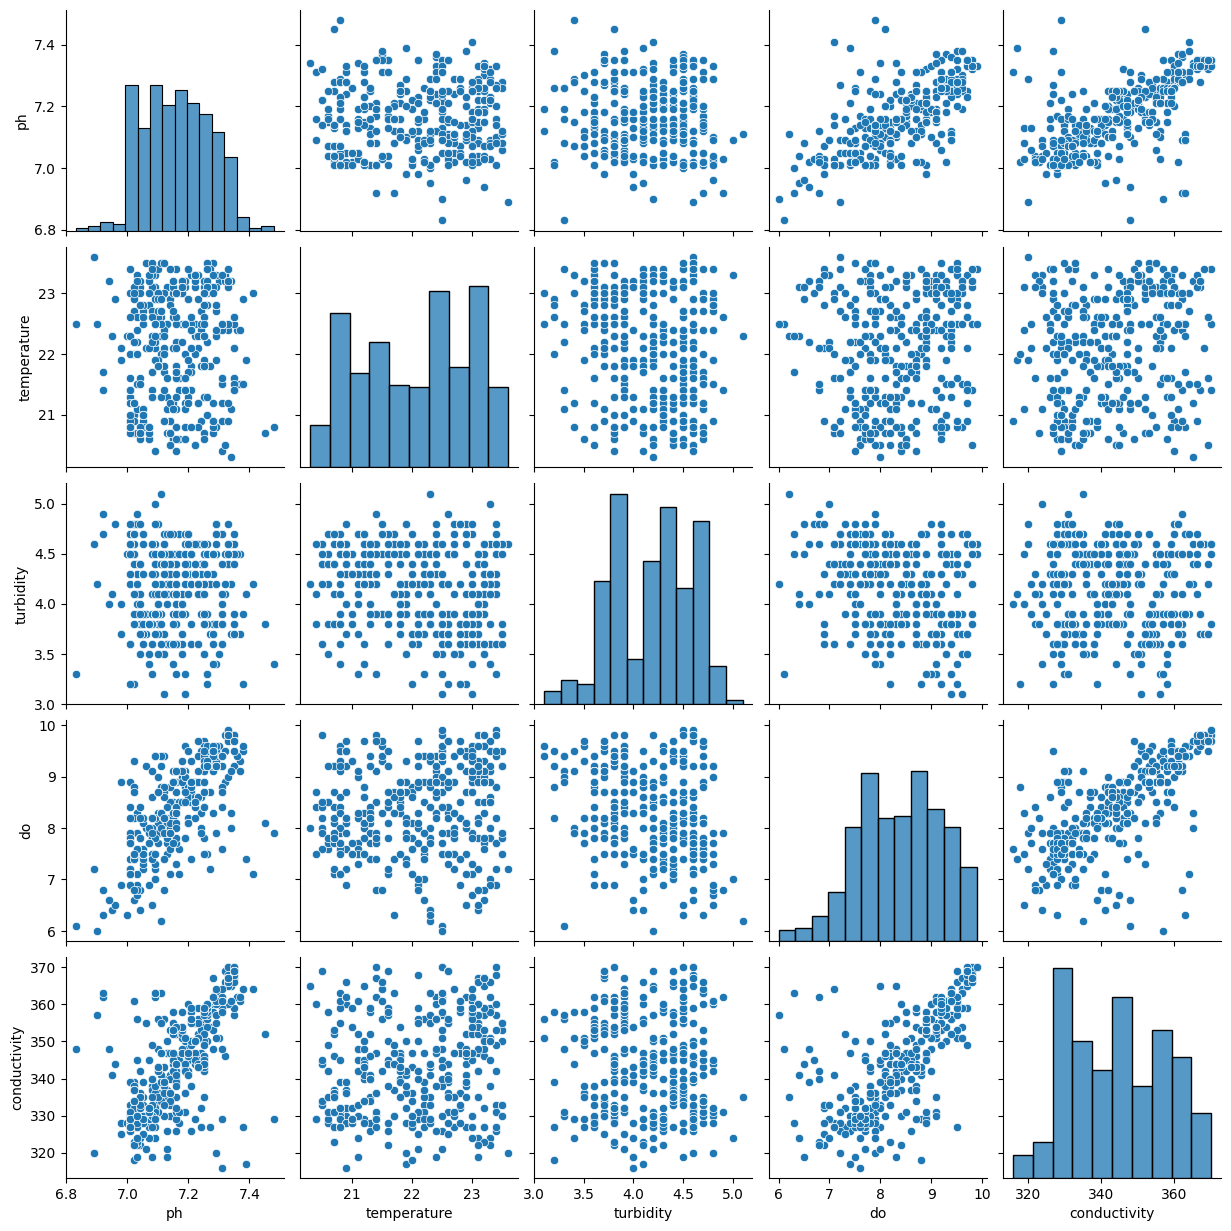

In [61]:
sns.pairplot(df)

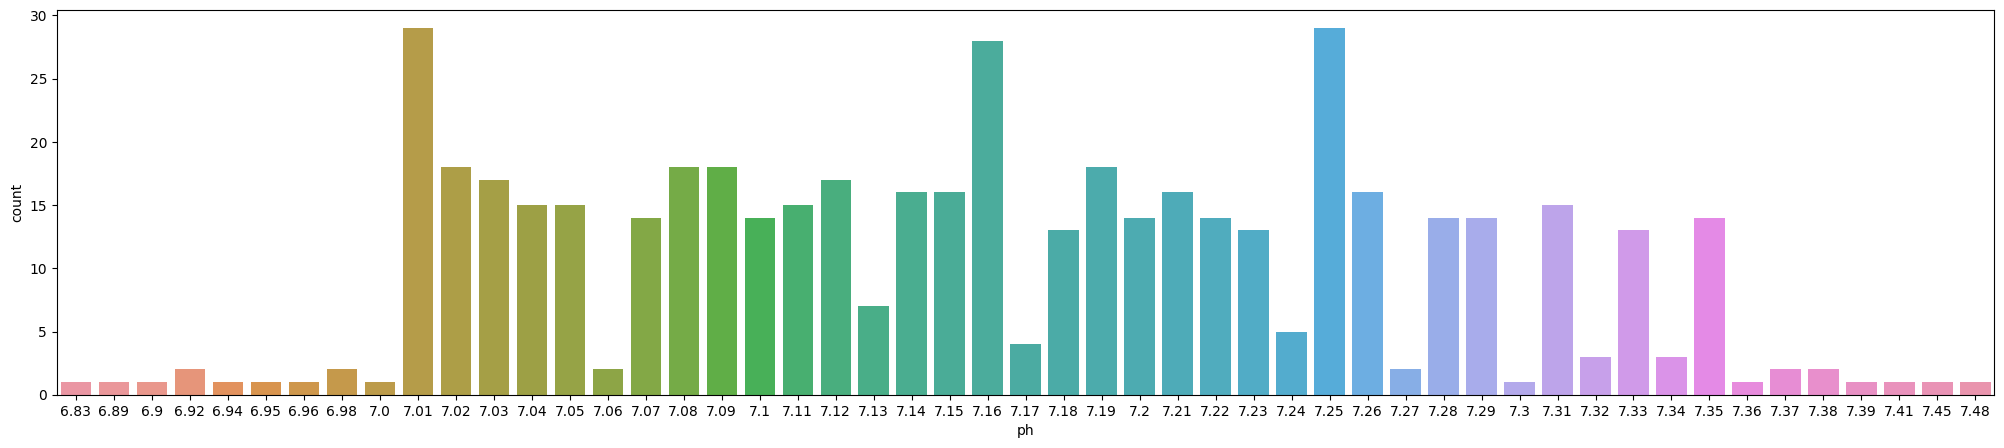

In [62]:
plt.figure(figsize=(25,5))
sns.countplot(df, x = "ph")
plt.show()

<AxesSubplot: xlabel='temperature', ylabel='conductivity'>

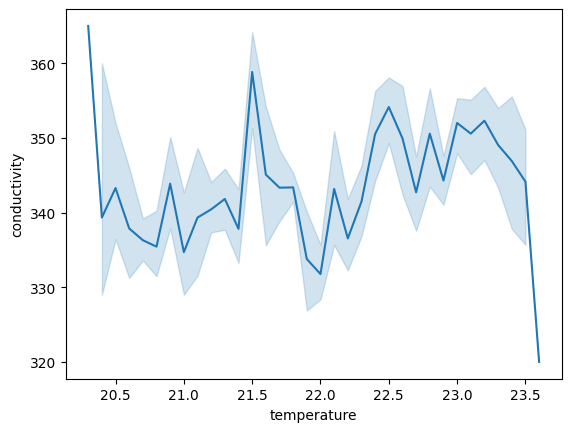

In [63]:
sns.lineplot(df,x="temperature",y="conductivity")

<AxesSubplot: xlabel='conductivity', ylabel='temperature'>

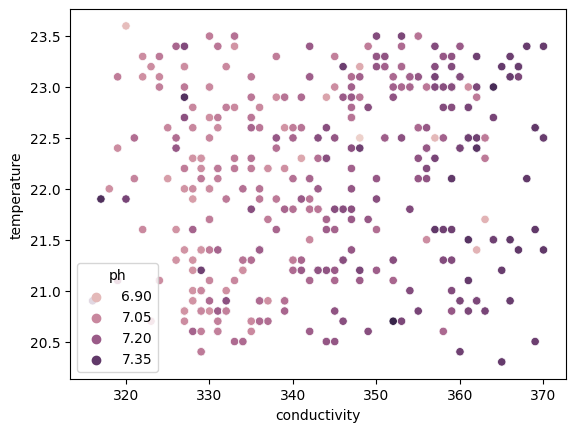

In [64]:
sns.scatterplot(df,x="conductivity",y="temperature",hue="ph")

<AxesSubplot: xlabel='conductivity', ylabel='temperature'>

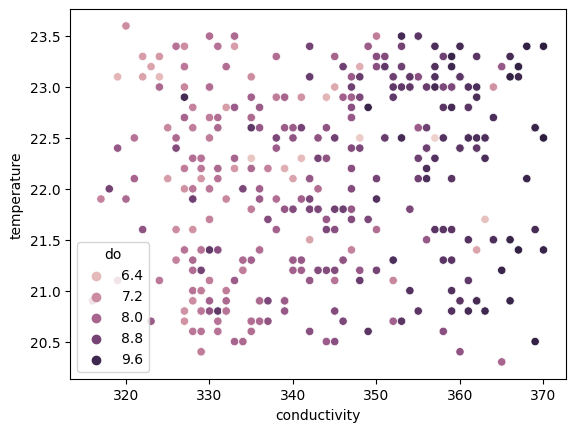

In [65]:
sns.scatterplot(df,x="conductivity",y="temperature",hue="do")

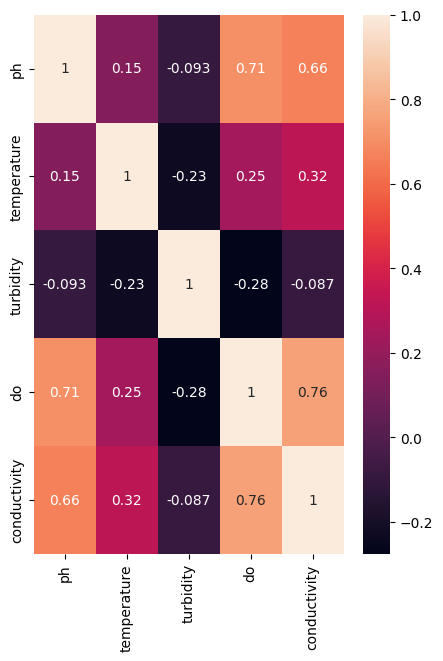

In [66]:
plt.figure(figsize=(5,7))
sns.heatmap(df.corr(), annot=True, )
plt.show()

In [79]:
y = df.do
x = df.iloc[:,[0,1,2,4]]

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [81]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [82]:
y_pred = rf.predict(x_test)

In [83]:
errors = [mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)]
errors

[0.26272562626261914, 0.7120092074666291]

In [84]:
rf.feature_importances_

array([0.24675635, 0.05666898, 0.06696476, 0.62960991])

In [86]:
df.head()

,ph,temperature,turbidity,do,conductivity
0,7.25,23.1,4.5,7.8,342
1,7.11,22.3,5.1,6.2,335
2,7.03,21.5,3.9,8.3,356
3,7.38,22.9,3.2,9.5,327
4,7.45,20.7,3.8,8.1,352
